In [5]:
import urllib.request
...
# Download the file from `url` and save it locally under `file_name`:
urllib.request.urlretrieve("https://nlp.stanford.edu/data/glove.6B.zip", "glove.zip")

('glove.zip', <http.client.HTTPMessage at 0x7f6c698ba940>)

In [6]:
import zipfile
with zipfile.ZipFile("glove.zip","r") as zip_ref:
    zip_ref.extractall("Glove")

In [7]:
import numpy as np # linear algebra
import pandas as pd 

In [8]:
def read_data(file_name):
    with open(file_name,'r') as f:
        word_vocab = set() # not using list to avoid duplicate entry
        word2vector = {}
        for line in f:
            line_ = line.strip() #Remove white space
            words_Vec = line_.split()
            word_vocab.add(words_Vec[0])
            word2vector[words_Vec[0]] = np.array(words_Vec[1:],dtype=float)
    print("Total Words in DataSet:",len(word_vocab))
    return word_vocab,word2vector

In [9]:
vocab, w2v = read_data("Glove/glove.6B.50d.txt")

Total Words in DataSet: 400000


In [10]:
def cos_sim(u,v):
    """
    u: vector of 1st word
    v: vector of 2nd Word
    """
    numerator_ = u.dot(v)
    denominator_= np.sqrt(np.sum(np.square(u))) * np.sqrt(np.sum(np.square(v)))
    return numerator_/denominator_

In [11]:
def return_matrix(random_words,dim =50):
    word_matrix = np.random.randn(len(random_words),dim)
    i = 0
    for word in random_words:
        word_matrix[i] = w2v[word]
        i +=1
    return word_matrix

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

In [14]:
random_words = ["society", "inject", "welcome", "guess", "wise", "needy","glue","wrong","boundary","daffy","wrench","enjoy"]
return_matrix_ = return_matrix(random_words)
pca_ = PCA(n_components=2)
viz_data = pca_.fit_transform(return_matrix_) 

(-5.0, 6.0)

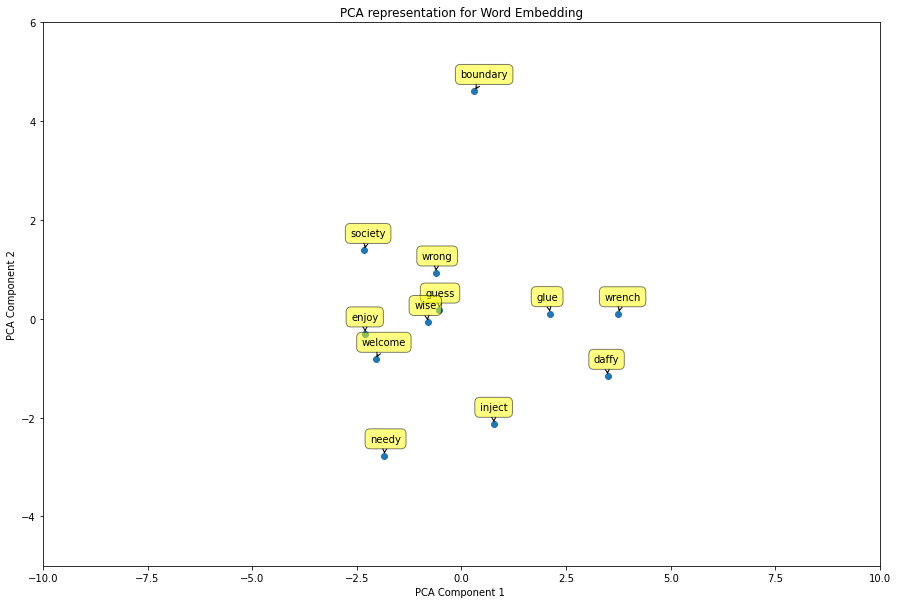

In [15]:
plt.scatter(viz_data[:,0],viz_data[:,1],cmap=plt.get_cmap('Spectral'))
for label,x,y in zip(random_words,viz_data[:,0],viz_data[:,1]):
    plt.annotate(
        label,
        xy=(x,y),
        xytext=(-14, 14),
        textcoords='offset points',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')
    )
plt.xlabel('PCA Component 1 ')
plt.ylabel('PCA Component 2')
plt.title('PCA representation for Word Embedding')
plt.xlim(-10,10)
plt.ylim(-5,6)